# ```pirel``` Tutorial : ```sweeps```
Another package of ```pirel``` is ```pirel.sweeps```, which is used to create arrays and matrices of ```LayoutPart``` instances.

Let's first create a suitable ```LayoutPart``` object

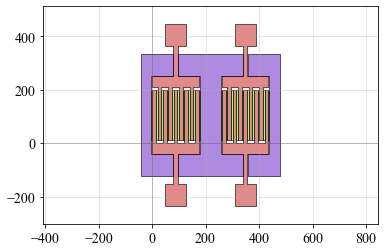

In [1]:
import pirel.pcells as pc
import pirel.modifiers as pm
import pirel.tools as pt

dut=pm.addPad(pm.array(pm.addPartialEtch(pc.LFERes)))(name='SweptDevice')

pt.check(dut.draw(),joined=True)

To create a parametric array of ```dut``` ,let's define a ```SweepParam``` from the package ```pirel.sweeps```

In [2]:
import pirel.sweeps as ps

x_param=ps.SweepParam({'IDTCoverage':[0.3,0.5,0.7],'IDTPitch':[5,10,15]})

In ```x_param```, we are sweeping two parameters at the same time : ```x_param``` is a sweep of length 3 , but each element has two parameters changing...

In other words...


In [6]:
len(x_param)

3

In [7]:
print(x_param(0))
print(x_param(1))
print(x_param(2))

{'IDTCoverage': 0.3, 'IDTPitch': 5}
{'IDTCoverage': 0.5, 'IDTPitch': 10}
{'IDTCoverage': 0.7, 'IDTPitch': 15}


To build an array, we initialize a ```PArray```, which is a ```LayoutPart``` in turn and so has access to all functionalities described for ```pcells``` and ```modifiers```.

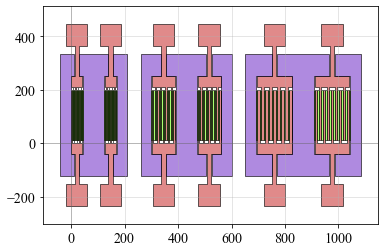

In [8]:
dut_array=ps.PArray(dut,x_param)
pt.check(dut_array.draw(),joined=True)

By default, this cell prints some labels on top and bottom of each sweep point.
You can remove this behavior by setting 

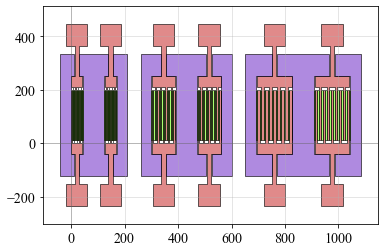

In [9]:
dut_array.labels_top=None
dut_array.labels_bottom=None
pt.check(dut_array.draw(),joined=True)

The next natural extension is to create ```PMatrix```.

We will need another parameter to sweep over the Y axis (```y_param```).

You will also see how to use the ```combine``` method to create more complicated sweeps.

drawing array 4 of 4

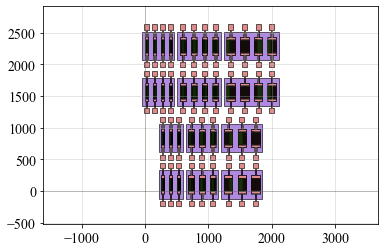

In [10]:
y_param1=ps.SweepParam({'NBlocks':[3,4]})
y_param2=ps.SweepParam({'AnchorSizeX':[20,40]})
y_param=y_param1.combine(y_param2)

dut_matrix=ps.PMatrix(dut,x_param,y_param)

dut_matrix.view()